# Preparing Data

In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [22]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('/content/dataset.csv')
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [23]:
heart_data.shape

(1025, 14)

In [24]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [25]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [26]:
heart_data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [27]:
heart_data['target'].value_counts()
# 1 = Have heart disease, 0 = DO not have heart

,count
target,
1,526
0,499


In [28]:
X = heart_data.drop(columns='target', axis=1)
y = heart_data['target']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
print('Data Size :'
      '\n\tX_train =', X_train.shape,
      '\n\tX_test =', X_test.shape,
      '\n\ty_train =', y_train.shape,
      '\n\ty_test =', y_test.shape)

Data Size :
	X_train = (820, 13) 
	X_test = (205, 13) 
	y_train = (820,) 
	y_test = (205,)


# Training Model

In [31]:
# Logistic Regression Model
# model = LogisticRegression()
# model.fit(X_train, y_train)

from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier Model
model = RandomForestClassifier(n_estimators=100,
                               max_depth=10,
                               min_samples_split=5,
                               min_samples_leaf=2,
                               random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       random_state=42)

In [32]:
train_y_pred = model.predict(X_train)
acc_score = accuracy_score(train_y_pred, y_train)
print('Training Accuracy :', acc_score)

Training Accuracy : 1.0


In [33]:
test_y_pred = model.predict(X_test)
acc_score = accuracy_score(test_y_pred, y_test)
print('Test Accuracy :', acc_score)

Test Accuracy : 0.9853658536585366


In [34]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, test_y_pred)
recall = recall_score(y_test, test_y_pred)
f1 = f1_score(y_test, test_y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


Precision: 1.0
Recall: 0.970873786407767
F1-score: 0.9852216748768473


In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error
n=len(X)
p=len(X.columns)
R2=  r2_score(y_test, test_y_pred)
Adj_r2 = 1-(1-R2)*(n-1)/(n-p-1)

print('Mean Squared Error:', mean_squared_error(y_test,  test_y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test,  test_y_pred))
print('Root Mean Squared Error:', root_mean_squared_error(y_test,  test_y_pred))
print('R2 Score:', R2)
print('Adjusted R2', Adj_r2)

Mean Squared Error: 0.014634146341463415
Mean Absolute Error: 0.014634146341463415
Root Mean Squared Error: 0.12097167578182678
R2 Score: 0.9414620217018846
Adjusted R2 0.9407093078365281


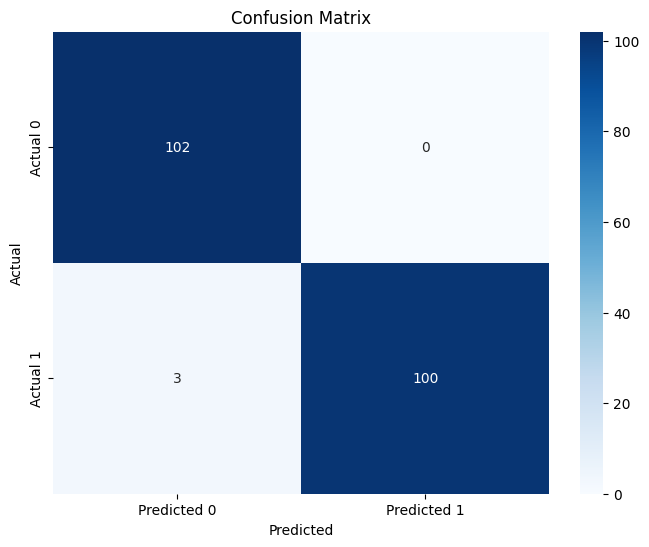

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, test_y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [37]:
input_data = (57,1,0,130,131,0,1,115,1,1.2,1,1,3)
np_df = np.asarray(input_data)
reshaped_df = np_df.reshape(1, -1)
prediction = model.predict(reshaped_df)

if prediction[0] == 0:
  print('The person doesn\'t have a Heart Disease')
else:
  print('The person has Heart Disease')

print(prediction.tostring())

The person doesn't have a Heart Disease
b'\x00\x00\x00\x00\x00\x00\x00\x00'


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
<ipython-input-37-462d8883ed1d>:11: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  print(prediction.tostring())
